## 1. Utilizando perceptron
É igual a utilizar o sgd com loss = 'perceptron', learning_rate = constant, eta0 = 1 and penalty = None

In [41]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [42]:
iris = load_iris()
iris_date = pd.Series(iris)
print (iris_date.keys())
print (iris_date[2])# feature_names
print (iris_date[1][0:2])# dados linha 0-1
print (iris_date[3][0:2])# target linha 0-1
print (iris_date['target_names'])# 0 setosa, 1 versicolor, 2 virginica

Index(['DESCR', 'data', 'feature_names', 'target', 'target_names'], dtype='object')
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]]
[0 0]
['setosa' 'versicolor' 'virginica']


In [43]:
X = iris.data[:,(2,3)] # petal length, petal width
y = (iris.target ==0).astype(np.int) # retorna 1 para setosa ou 0 else

In [44]:
per_clf = Perceptron(random_state = 42)
per_clf.fit (X,y)

C:\Users\Tales\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [45]:
y_pred = per_clf.predict ([[2,0.5]]) # predict quando petal length = 2 and petal width = .5
print (y_pred) # retornara 1 se a planta for setosa, ou 0 else

[1]


Saving figure perceptron_iris_plot


C:\Users\Tales\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


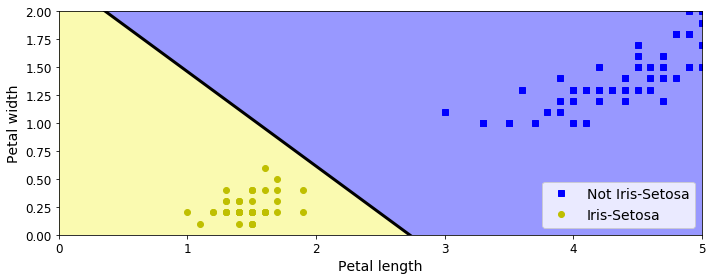

In [46]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

## 2. Training Multi-Layer Perceptron (MLP) with tensorflow API

In [49]:
import tensorflow as tf

In [50]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [51]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [56]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config
dnn_clf = tf.contrib.learn.DNNClassifier (hidden_units=[300,100], n_classes = 10, feature_columns =feature_cols )
dnn_clf = tf.contrib.learn.SKCompat (dnn_clf)
dnn_clf.fit (X_train,y_train,batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000158E33D6390>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Tales\\AppData\\Local\\Temp\\tmp94y_3xmf'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to

INFO:tensorflow:loss = 0.0112558, step = 6801 (0.264 sec)
INFO:tensorflow:global_step/sec: 370.071
INFO:tensorflow:loss = 0.012174, step = 6901 (0.270 sec)
INFO:tensorflow:global_step/sec: 378.497
INFO:tensorflow:loss = 0.0202864, step = 7001 (0.264 sec)
INFO:tensorflow:global_step/sec: 366.67
INFO:tensorflow:loss = 0.00625903, step = 7101 (0.273 sec)
INFO:tensorflow:global_step/sec: 347.505
INFO:tensorflow:loss = 0.0424367, step = 7201 (0.288 sec)
INFO:tensorflow:global_step/sec: 342.728
INFO:tensorflow:loss = 0.00745597, step = 7301 (0.292 sec)
INFO:tensorflow:global_step/sec: 344.504
INFO:tensorflow:loss = 0.0187673, step = 7401 (0.290 sec)
INFO:tensorflow:global_step/sec: 363.329
INFO:tensorflow:loss = 0.00583095, step = 7501 (0.275 sec)
INFO:tensorflow:global_step/sec: 359.387
INFO:tensorflow:loss = 0.0481218, step = 7601 (0.278 sec)
INFO:tensorflow:global_step/sec: 348.111
INFO:tensorflow:loss = 0.0128478, step = 7701 (0.287 sec)
INFO:tensorflow:global_step/sec: 365.996
INFO:tens

INFO:tensorflow:loss = 0.000328393, step = 15001 (0.275 sec)
INFO:tensorflow:global_step/sec: 365.996
INFO:tensorflow:loss = 0.00189539, step = 15101 (0.273 sec)
INFO:tensorflow:global_step/sec: 352.418
INFO:tensorflow:loss = 0.0034584, step = 15201 (0.284 sec)
INFO:tensorflow:global_step/sec: 344.504
INFO:tensorflow:loss = 0.00162532, step = 15301 (0.290 sec)
INFO:tensorflow:global_step/sec: 371.45
INFO:tensorflow:loss = 0.00173656, step = 15401 (0.269 sec)
INFO:tensorflow:global_step/sec: 365.326
INFO:tensorflow:loss = 0.00547867, step = 15501 (0.273 sec)
INFO:tensorflow:global_step/sec: 322.764
INFO:tensorflow:loss = 0.00416432, step = 15601 (0.310 sec)
INFO:tensorflow:global_step/sec: 359.402
INFO:tensorflow:loss = 0.00692297, step = 15701 (0.279 sec)
INFO:tensorflow:global_step/sec: 367.345
INFO:tensorflow:loss = 0.000953432, step = 15801 (0.272 sec)
INFO:tensorflow:global_step/sec: 368.702
INFO:tensorflow:loss = 0.000488114, step = 15901 (0.272 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.00305589, step = 23101 (0.266 sec)
INFO:tensorflow:global_step/sec: 379.217
INFO:tensorflow:loss = 0.0020188, step = 23201 (0.264 sec)
INFO:tensorflow:global_step/sec: 376.354
INFO:tensorflow:loss = 0.00203943, step = 23301 (0.266 sec)
INFO:tensorflow:global_step/sec: 358.756
INFO:tensorflow:loss = 0.000679559, step = 23401 (0.279 sec)
INFO:tensorflow:global_step/sec: 375.646
INFO:tensorflow:loss = 0.000418256, step = 23501 (0.266 sec)
INFO:tensorflow:global_step/sec: 375.646
INFO:tensorflow:loss = 0.000777161, step = 23601 (0.267 sec)
INFO:tensorflow:global_step/sec: 382.107
INFO:tensorflow:loss = 0.000436728, step = 23701 (0.262 sec)
INFO:tensorflow:global_step/sec: 375.631
INFO:tensorflow:loss = 0.00131142, step = 23801 (0.266 sec)
INFO:tensorflow:global_step/sec: 374.94
INFO:tensorflow:loss = 0.00171952, step = 23901 (0.267 sec)
INFO:tensorflow:global_step/sec: 376.355
INFO:tensorflow:loss = 0.000865302, step = 24001 (0.266 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:loss = 0.000665226, step = 31201 (0.270 sec)
INFO:tensorflow:global_step/sec: 368.022
INFO:tensorflow:loss = 0.000692151, step = 31301 (0.271 sec)
INFO:tensorflow:global_step/sec: 368.023
INFO:tensorflow:loss = 0.000829301, step = 31401 (0.272 sec)
INFO:tensorflow:global_step/sec: 369.385
INFO:tensorflow:loss = 0.000273797, step = 31501 (0.271 sec)
INFO:tensorflow:global_step/sec: 372.142
INFO:tensorflow:loss = 0.000228065, step = 31601 (0.269 sec)
INFO:tensorflow:global_step/sec: 372.129
INFO:tensorflow:loss = 0.00038282, step = 31701 (0.268 sec)
INFO:tensorflow:global_step/sec: 383.592
INFO:tensorflow:loss = 0.00014376, step = 31801 (0.261 sec)
INFO:tensorflow:global_step/sec: 372.126
INFO:tensorflow:loss = 0.000782363, step = 31901 (0.269 sec)
INFO:tensorflow:global_step/sec: 368.702
INFO:tensorflow:loss = 0.000326573, step = 32001 (0.271 sec)
INFO:tensorflow:global_step/sec: 363.329
INFO:tensorflow:loss = 0.00036483, step = 32101 (0.275 sec)
INFO:tensorflow:global_s

INFO:tensorflow:loss = 9.57753e-05, step = 39301 (0.329 sec)
INFO:tensorflow:global_step/sec: 349.115
INFO:tensorflow:loss = 0.00060351, step = 39401 (0.286 sec)
INFO:tensorflow:global_step/sec: 370.042
INFO:tensorflow:loss = 0.000120858, step = 39501 (0.271 sec)
INFO:tensorflow:global_step/sec: 353.652
INFO:tensorflow:loss = 0.000485862, step = 39601 (0.282 sec)
INFO:tensorflow:global_step/sec: 356.176
INFO:tensorflow:loss = 0.000125617, step = 39701 (0.282 sec)
INFO:tensorflow:global_step/sec: 346.392
INFO:tensorflow:loss = 0.000711006, step = 39801 (0.289 sec)
INFO:tensorflow:global_step/sec: 343.91
INFO:tensorflow:loss = 0.000690708, step = 39901 (0.291 sec)
INFO:tensorflow:Saving checkpoints for 40000 into C:\Users\Tales\AppData\Local\Temp\tmp94y_3xmf\model.ckpt.
INFO:tensorflow:Loss for final step: 0.000462237.


SKCompat()

In [57]:
from sklearn.metrics import accuracy_score
y_pred = dnn_clf.predict(X_test)
accuracy_score (y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\Tales\AppData\Local\Temp\tmp94y_3xmf\model.ckpt-40000


0.98250000000000004

## 3. Training MLP low level

In [70]:
# construction phase
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [71]:
X = tf.placeholder(tf.float32,shape=(None,n_inputs), name='X') # shape [mini-batch, 28 x 28]
y = tf.placeholder(tf.int64,shape=(None),name='y') # shape = mini-batch

In [72]:
def neuron_layer(X,n_neurons,name,activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1]) # numero inputs 28*28
        stddev = 2 / np.sqrt(n_inputs) # 2/sqrt(28*28)
        init = tf.truncated_normal((n_inputs,n_neurons),stddev = stddev) # inicializador de variaveis
        W = tf.Variable(init, name='kernel')
        b = tf.Variable(tf.zeros([n_neurons]),name='bias') # bias é somado em cada row
        Z = tf.matmul (X,W)+b
        if activation is not None:
            return activation(Z)
        else:
            return (Z)

In [73]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [74]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [75]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [76]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [77]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [78]:
n_epochs = 40
batch_size = 50

In [80]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.88 Val accuracy: 0.9134
1 Train accuracy: 0.98 Val accuracy: 0.9316
2 Train accuracy: 0.98 Val accuracy: 0.943
3 Train accuracy: 0.88 Val accuracy: 0.947
4 Train accuracy: 0.98 Val accuracy: 0.953
5 Train accuracy: 0.98 Val accuracy: 0.9588
6 Train accuracy: 0.96 Val accuracy: 0.9588
7 Train accuracy: 0.96 Val accuracy: 0.9644
8 Train accuracy: 0.98 Val accuracy: 0.9644
9 Train accuracy: 1.0 Val accuracy: 0.9672
10 Train accuracy: 0.94 Val accuracy: 0.966
11 Train accuracy: 1.0 Val accuracy: 0.9694
12 Train accuracy: 1.0 Val accuracy: 0.9688
13 Train accuracy: 0.98 Val accuracy: 0.9694
14 Train accuracy: 1.0 Val accuracy: 0.9714
15 Train accuracy: 1.0 Val accuracy: 0.9706
16 Train accuracy: 1.0 Val accuracy: 0.9724
17 Train accuracy: 0.96 Val accuracy: 0.9716
18 Train accuracy: 1.0 Val accuracy: 0.974
19 Train accuracy: 1.0 Val accuracy: 0.9728
20 Train accuracy: 0.98 Val accuracy: 0.9726
21 Train accuracy: 1.0 Val accuracy: 0.976
22 Train accuracy: 0.98 Val accurac

In [81]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [82]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [83]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [84]:
show_graph(tf.get_default_graph())